In [65]:
import numpy as np
import matplotlib.pyplot as plt
from LoopStructural.utils.helper import rotation
from LoopStructural import GeologicalModel
from LoopStructural.visualisation import LavaVuModelViewer
from LoopStructural import GeologicalModel
from LoopStructural.utils import log_to_file
from LoopStructural.analysis import displacement_missfit
from LoopStructural.utils import process_map2loop, build_model
fault_params = {'interpolatortype':'FDI',
                'nelements':1e3,
#                 'data_region':.2, 
                'fault_buffer':0.4,
                'solver':'pyamg',
#                 overprints:overprints,
                'cpw':10,
                'npw':10}
foliation_params = {'nelements':1e4,  # how many tetras/voxels
                    'buffer':2.5,  # how much to extend nterpolation around box
                    'solver':'pyamg',
                    'npw':1,
                    'cpw':1,
                    'interpolatortype':'FDI',
                    'damp':True}
# global evaluate_value_calls 
view = LavaVuModelViewer()
images = {}
vectors = {}
#for angle in np.arange(0,360,30):#[-90,-60,-30,0,30,60,90]:
m2l_data = process_map2loop('./gmdpaper-faultslip')


2021-03-16 04:36:11,898 ~ LoopStructural.visualisation.model_visualisation ~ ERROR      ~ Plot area has not been defined.
2021-03-16 04:36:11,898 ~ LoopStructural.visualisation.model_visualisation ~ ERROR      ~ Plot area has not been defined.
2021-03-16 04:36:11,898 ~ LoopStructural.visualisation.model_visualisation ~ ERROR      ~ Plot area has not been defined.


In [66]:
for k,f in m2l_data['stratigraphic_column']['faults'].items():
    #     print(f.keys())
        f['HorizontalRadius'] *=2
        f['VerticalRadius'] *=2

In [67]:
m2l_data['data']['feature_name'].str.find('Fault') > -1

0      False
1      False
2      False
3      False
4      False
       ...  
154     True
155     True
156     True
157     True
158     True
Name: feature_name, Length: 159, dtype: bool

In [76]:
np.random.normal(0,10)

0.48603290443055536

In [84]:
models = {}
for i in range(10):#angle in np.arange(45,90,5):#angle = 0
    models[i] = {}
    m2l_data = process_map2loop('./gmdpaper-faultslip')
    mask = np.logical_and(m2l_data['data']['feature_name'].str.find('Fault') > -1,~np.isnan(m2l_data['data']['gx']))
    rotation_matrix = rotation(np.array([0.,0.,-1.]),angle)
    vector = m2l_data['data'].loc[mask,['gx','gy','gz']].to_numpy()
    
    
    #print(m2l_data['data'].loc[mask,['gx','gy','gz']])
    for k,f in m2l_data['stratigraphic_column']['faults'].items():
        dip = 90 - np.random.normal(0,10)
        angle = np.random.normal(0,90)
        models[i][k] = [dip,angle]
        mask2 = np.logical_and(mask,m2l_data['data']['feature_name'] ==k)
        m2l_data['data'].loc[mask2,['gz']] = np.cos(np.deg2rad(dip))#np.einsum('ij,kj->kj',rotation_matrix,vector)
        m2l_data['data'].loc[mask,['gx','gy','gz']]/=np.linalg.norm(m2l_data['data'].loc[mask,['gx','gy','gz']],axis=1)[:,None]
        normal_vector = m2l_data['data'].loc[np.logical_and(mask,m2l_data['data']['feature_name'] ==k),['gx','gy','gz']].mean()
        f['FaultNorm']=normal_vector
        tangent = np.zeros(3)
        tangent[0] = -normal_vector[1]
        tangent[1] = normal_vector[0]
        
        slip_vector = np.cross(tangent,normal_vector)
        slip_vector = np.dot(rotation(f['FaultNorm'],angle),slip_vector)
        
        f['HorizontalRadius'] *=2
        f['VerticalRadius'] *=2
        
        f['FaultSlip'] = slip_vector#np.dot(rotation(f['FaultNorm'],angle),f['FaultSlip'])
#         vectors[angle][k] = f['FaultSlip']
    m2l_data['stratigraphic_column']
    model = build_model(m2l_data,
                        skip_faults=False,
                        rescale=False,
                        evaluate=False,
                        fault_params=fault_params,
                        foliation_params=foliation_params,
                        unconformities=False)
    models[i]['model'] = model                                                                                                    
    # model, m2l_data = GeologicalModel.from_map2loop_directory('./gmdpaper-faultslip',
    #                                                         skip_faults=False,
    #                                                           rescale=False,
    #                                                           evaluate=False,
    #                                                         fault_params=fault_params,
    #                                                         foliation_params=foliation_params,
    #                                                          unconformities=False)
    # for f in model.features:
    #     if f.type == 'fault':
    #         print(f[0].interpolator.nx)
    #     else:
    #         print(f.interpolator.nx)
    model.update()
    view.clear()
    view.model = model
    view.nelements=5e6

    view.add_model()#_surfaces(name='_angle_{}'.format(angle),faults=False,alpha=0.5)
    view.rotation = [-62.97486877441406, -32.8342399597168, -4.263551712036133]
#     images[angle] = view.image_array()
    models[i]['image'] = view.image_array()

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

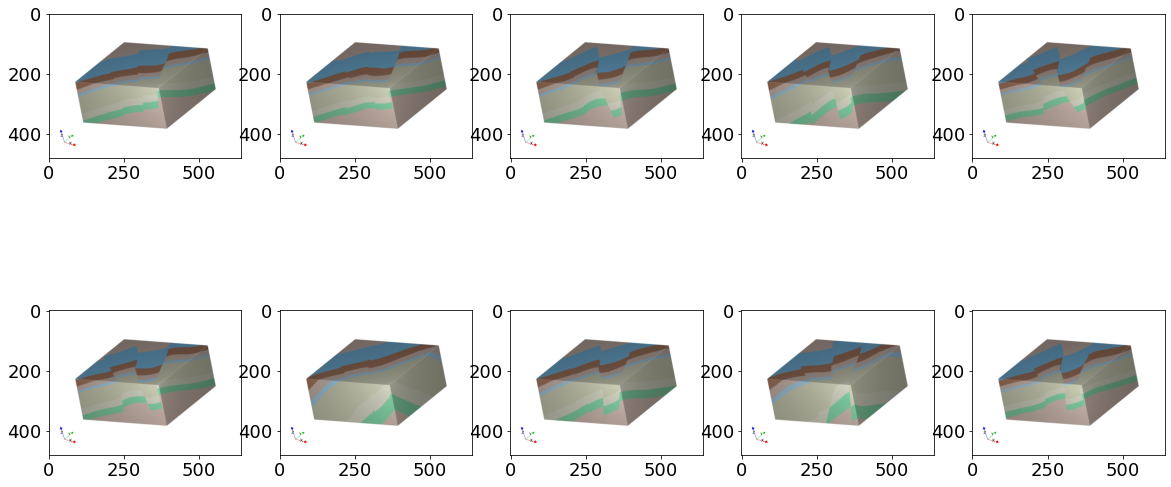

In [92]:
fig, ax = plt.subplots(2,5,figsize=(20,10))
for i in range(10):
    ax[i//5,i%5].imshow(models[i]['image'])

In [83]:
models[0]

{'Fault_7344': [88.07435799090283, 33.95725740273896],
 'Fault_5997': [77.816942873293, 29.67792019560754],
 'Fault_6205': [96.86917321456588, 22.668087357669904],
 'model': <LoopStructural.modelling.core.geological_model.GeologicalModel at 0x7efc9d8a87d0>,
 'image': array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],


In [63]:
view.nelements=1e5
view.clear()
view.add_model_surfaces()
view.add_data(model['supergroup_0'])
view.add_data(model['Fault_7344'][0])
view.add_data(model['Fault_5997'][0])
view.add_data(model['Fault_6205'][0])
view.add_vector_field(model['Fault_6205'][1],locations=model.regular_grid()[::100])
view.add_vector_field(model['Fault_7344'][1],locations=model.regular_grid()[::100])
view.add_vector_field(model['Fault_5997'][1],locations=model.regular_grid()[::100])

view.interactive()

  0%|          | 0/11 [00:00<?, ?it/s]

Adding surfaces took 6.082251071929932 seconds



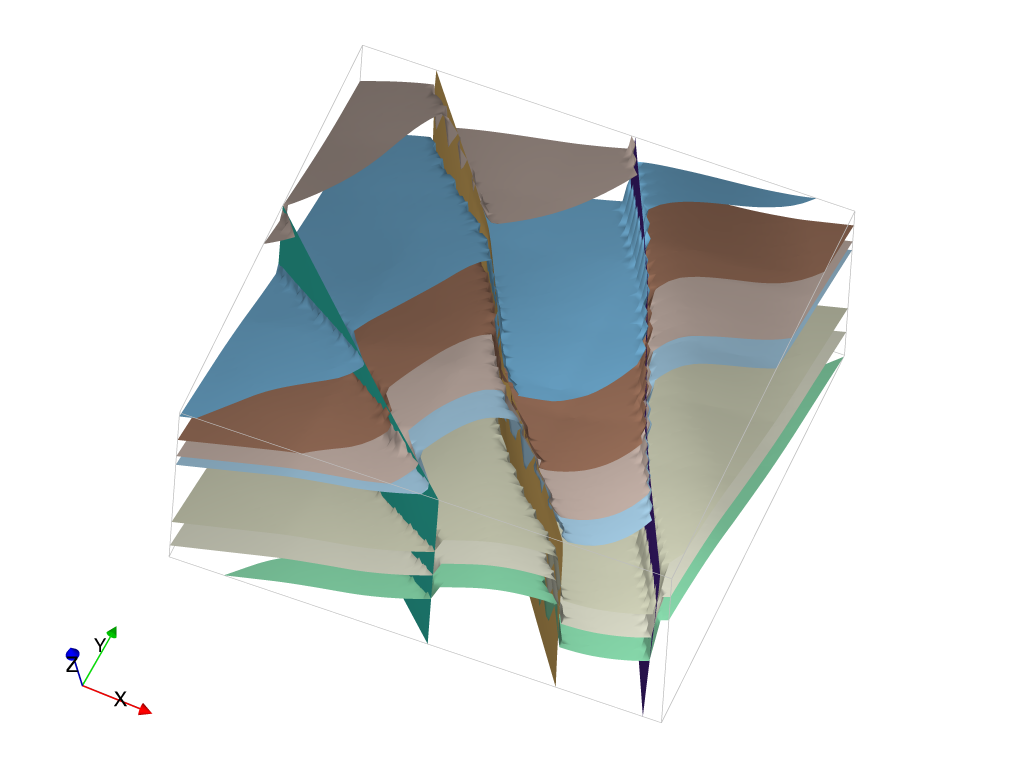

In [46]:
view.display()

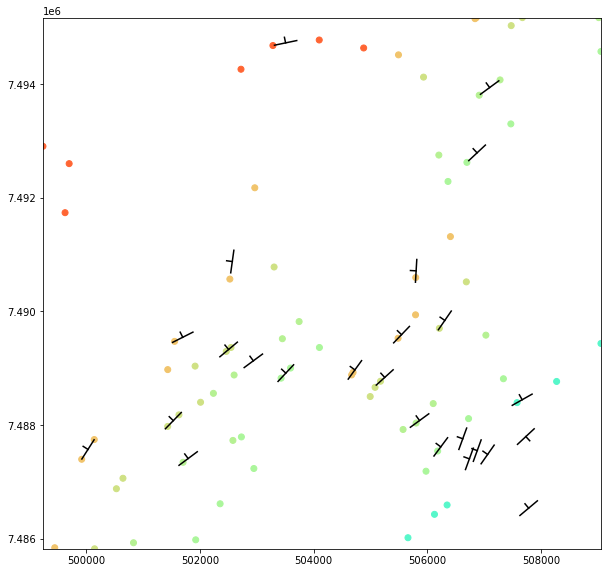

In [40]:
from LoopStructural.visualisation import MapView
mapview = MapView(model)
mapview.add_data(model['supergroup_0'],dip=False,symb_scale=200)

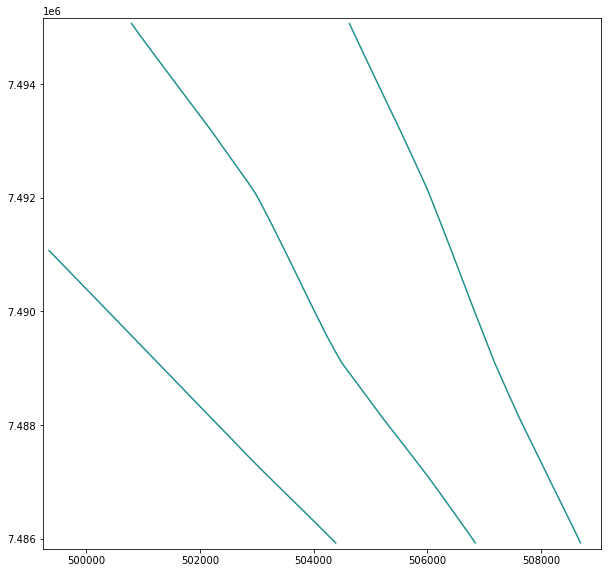

In [42]:
mapview = MapView(model)
mapview.add_faults()

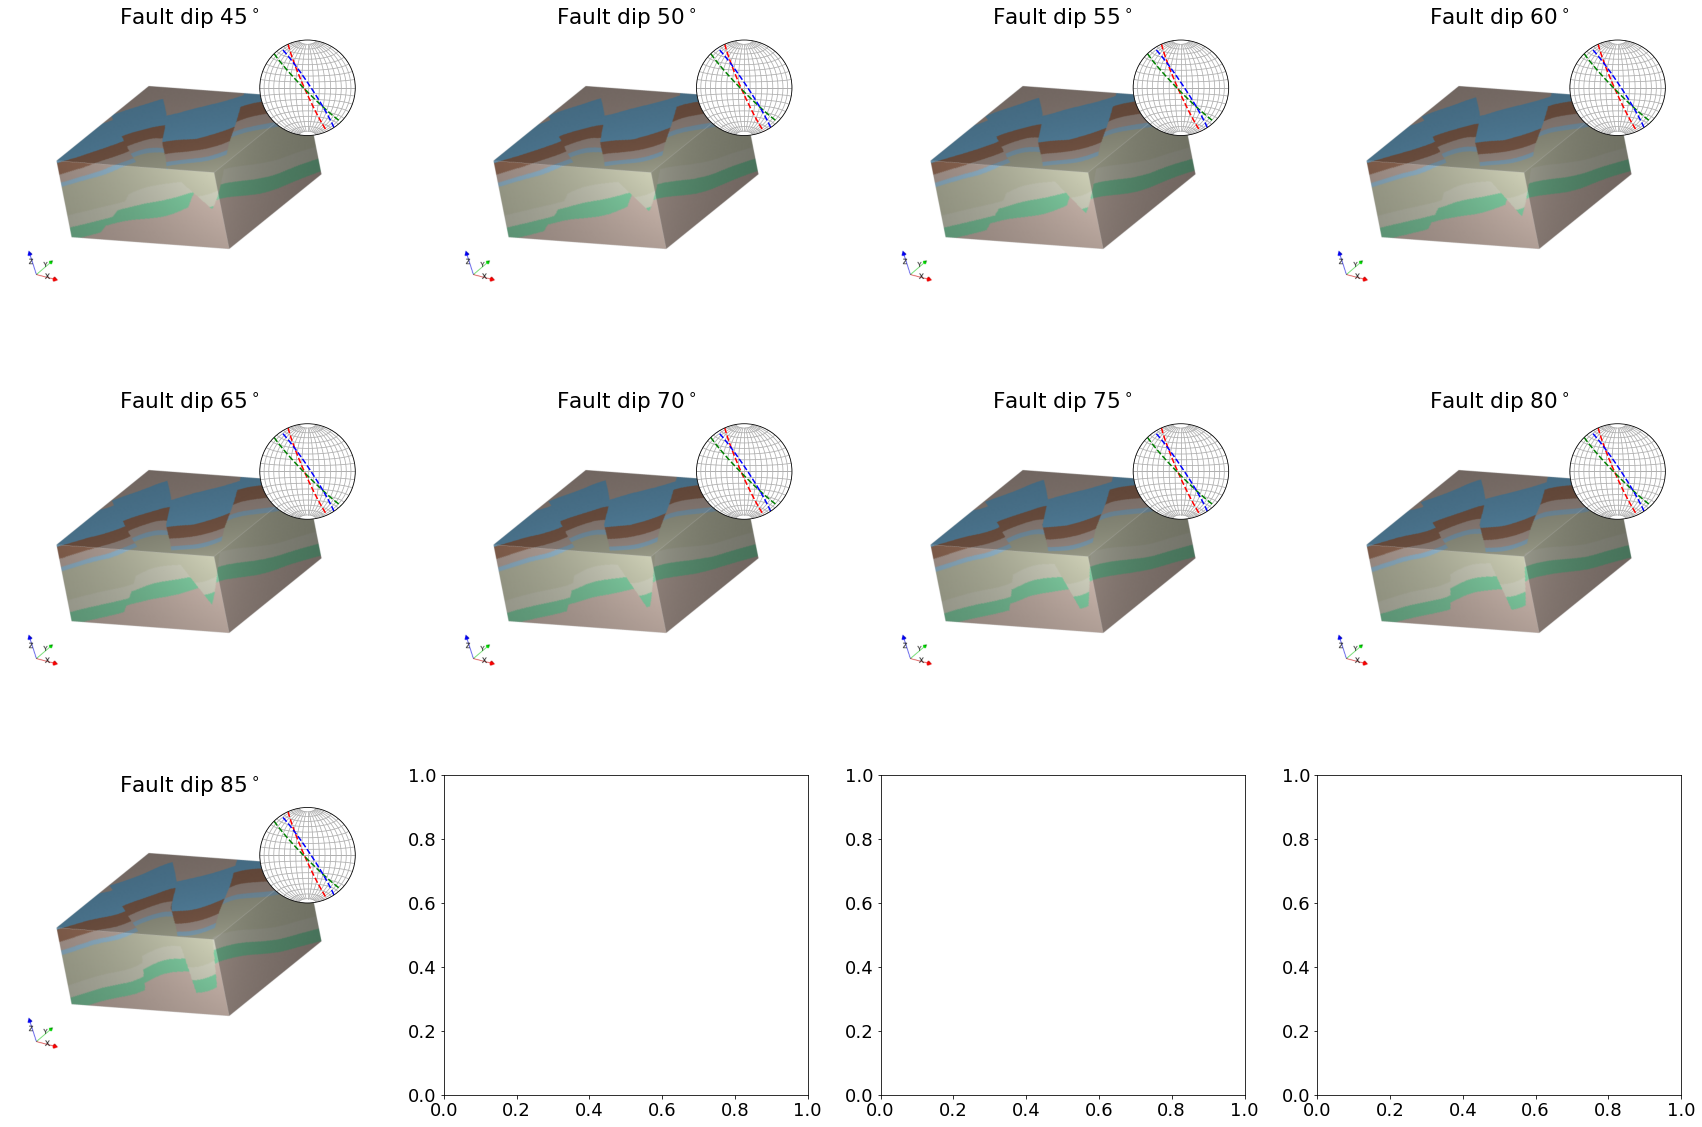

In [71]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mplstereonet import StereonetAxes
import matplotlib
import mplstereonet
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(3,4,figsize=(30,20))

# for j in range(3):
# #     ax[0,j].axis('off')
#     ax[0,j].imshow(images[-j*30])
# #     ax[1,j].axis('off')
#     ax[1,j].imshow(images[j*30])
#     ax[1,j].set_title('{}'.format(-(j+1)*30))
#     ax[0,j].set_title('{}'.format((j+1)*30))
angles = np.arange(45,90,5)
for i,im in enumerate(images.values()):
    ax[i//4,i%4].axis('off')
    ax[i//4,i%4].imshow(im)
    ax[i//4,i%4].set_title(r'Fault dip ${}^\circ$'.format(angles[i]))
    
    stereo = inset_axes(ax[i//4,i%4], width="30%", height="35%", loc=1,axes_class=StereonetAxes)
    stereo.set_azimuth_ticks([])
    stereo.grid()
    v = vectors[angles[i]]
    colours = ['red','green','blue','orange']
    k = 0
    for fault in m2l_data['stratigraphic_column']['faults'].values():
#             print(fault)
#         print(colours[k])
        stereo.plane(*mplstereonet.vector2pole(*tuple(fault['FaultNorm'])),color=colours[k],linestyle='dashed')
        k+=1
    k=0
    for f,vec in v.items():
        if i*30 < 180:
            col = 'black'
        else:
            col = 'red'
        stereo.line(*mplstereonet.vector2plunge_bearing(*tuple(vec)),color=colours[k])
        k+=1
#     plt.figure()
# plt.tight_layout()

In [14]:
view2 = LavaVuModelViewer(model)
k = 0
for fault in m2l_data['stratigraphic_column']['faults'].keys():
    view.add_isosurface(model[fault],value=0,colour=colours[k])
    k+=1
view.interactive()


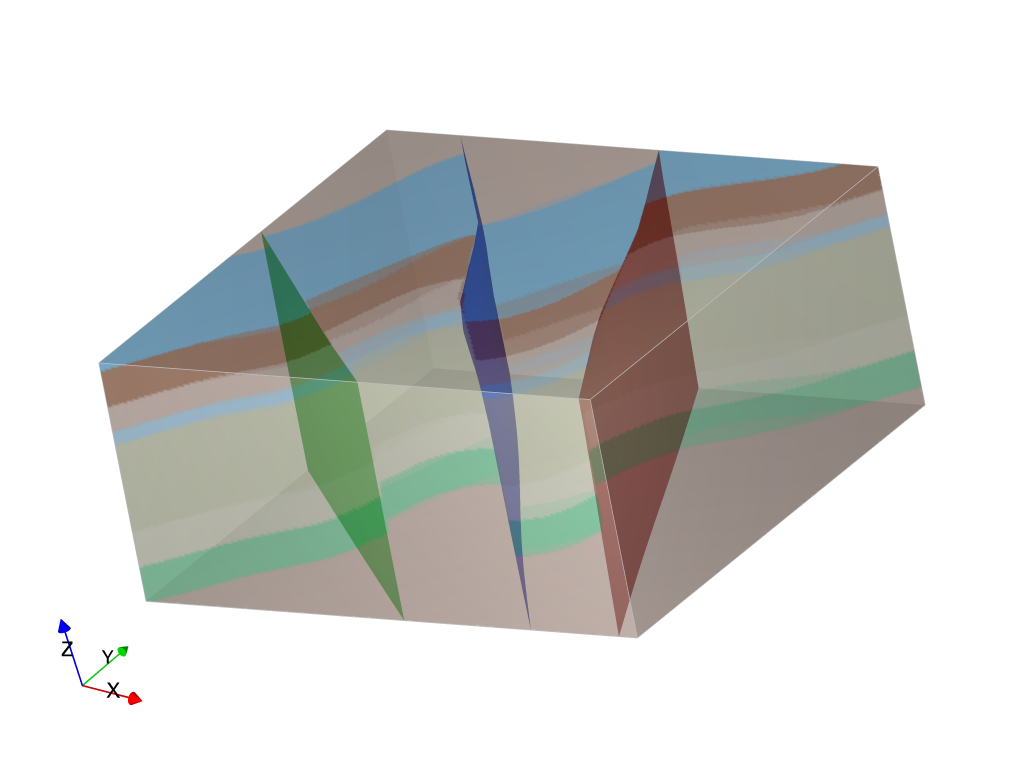

In [16]:
view.rotation = [-62.97486877441406, -32.8342399597168, -4.263551712036133]
view.display()